Attached is a CSV file with some anonymized user data. The data corresponds to customers who purchase hair care products. Each row is a user (with a corresponding user_id) and there are 88759 users. The table contains 109 columns, or features, where user_id is considered a feature.

There is no transaction data, but we summarize customers' transaction history using lifetime total revenue (LTR). This is the column in the dataset with label "predicted_future_ltr_10yr". Also included are revenue (total revenue so far) and purchases (total number of orders so far). There are also user-profile questions that were provided via an online Quiz. The 109 columns include categorical data that has been one-hot-encoded. 

Recall the goal of this project is to write a small Python package (or web app) to cluster users. The challenge is to eventually make the code flexible enough that we can choose to use different "loss functions" for each feature. We can chat about this more in our syncs, but for now get accustomed to the data and consider writing a K-means algorithm for clustering.


In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
!ls

Project.ipynb         heatmap.png           user_data_rui_liu.csv
README.md             kmeans.py


# import dataset

In [3]:
# importing dataset
filePath = r"/Users/Rui/Documents/Doc/Job/Data Incubator/Capstone/Project/"
fileName = filePath + r"user_data_rui_liu.csv"
dataset = pd.read_csv(fileName)

In [4]:
pd.set_option('max_columns',1000) 
pd.set_option('max_row',300) 
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [5]:
dataset.head(5)

,user_id,visit_count,avg_session_length,visitor_age,country,city,state,longitude,latitude,total_pages,pages_color-translator,pages_account,pages_colorbar,pages_shop,pages_welcome,pages_learn-more,pages_landing,pages_hair-dye-ingredients,pages_confirmation,pages_hair-color-chart,pages_shopping,pages_faqs,pages_hair-colorist,pages_how-to-color-your-hair,pages_other,pages_refer,pages_support,pages_color-advisor,pages_cart,pages_compare-shades,pages_notloggedin,pages_blog,pages_search,pages_hair-color,pages_checkout,pages_about,pages_product,pages_membership,pages_share,pages_signIn,pages_email-unsubscribe,device_desktop,device_mobile,device_tablet,browser_firefox,browser_chrome,browser_other,browser_ie,browser_facebook,browser_safari,utm_direct,utm_iterable,utm_other,utm_bronto,utm_facebook,utm_google,medium_cpc,medium_none,medium_other,medium_email,medium_organic,medium_fbigan,purchases,revenue,total_customer_type,customer_type_colorbar,customer_type_rootreboot,customer_type_other,customer_type_gloss,customer_type_color,total_order_type,order_type_one-time,order_type_subscription,order_type_renewal,predicted_future_ltr_10yr,"COLOR_WHERE_\at_salon\""""","COLOR_WHERE_\salon_and_home\""""","COLOR_WHERE_\at_home\""""","COMFORT_LEVEL_\somewhat_comfortable\""""","COMFORT_LEVEL_\very_comfortable\""""","COMFORT_LEVEL_\comfortable\""""","COMFORT_LEVEL_\not_comfortable\""""","DO_WITH_HAIR_\highlight_only\""""","DO_WITH_HAIR_\change\""""","DO_WITH_HAIR_\not_sure\""""","DO_WITH_HAIR_\touch_up\""""","DO_WITH_HAIR_\color_and_highlights\""""",FREQUENCY_7,FREQUENCY_3,FREQUENCY_8,FREQUENCY_5,FREQUENCY_other,FREQUENCY_6,FREQUENCY_4,FREQUENCY_12,FREQUENCY_2,"GRAY_LEVEL_\not_sure\""""","GRAY_LEVEL_\all\""""","GRAY_LEVEL_\more_than_50\""""","GRAY_LEVEL_\no_gray\""""","GRAY_LEVEL_\less_than_50\""""","HAIR_COLOR_\black\""""","HAIR_COLOR_\red\""""","HAIR_COLOR_\brown\""""","HAIR_COLOR_\blonde\""""","NATURAL_HAIR_COLOR_\black\""""","NATURAL_HAIR_COLOR_\red\""""","NATURAL_HAIR_COLOR_\brown\""""","NATURAL_HAIR_COLOR_\blonde\"""""
0,1002185,1,2.58333,3284.86667,United States,San Jose,California,-121.90520,37.34220,3.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.33333,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.33333,0.00000,0.33333,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,13,381.30000,23.00000,0.00000,0.00000,0.00000,0.00000,1.00000,23.00000,0.08696,0.04348,0.86957,1458.99873,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000
1,1002442,1,7.45000,38958.71667,United States,Vail,Colorado,-106.37420,39.64030,12.00000,0.00000,0.00000,0.00000,0.16667,0.00000,0.00000,0.00000,0.00000,0.08333,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.08333,0.00000,0.00000,0.00000,0.00000,0.00000,0.16667,0.00000,0.41667,0.00000,0.00000,0.08333,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,3,331.45000,4.00000,0.00000,0.00000,0.00000,0.00000,1.00000,4.00000,1.00000,0.00000,0.00000,589.00726,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000
2,1004042,3,3.16111,158199.40000,United States,Ocean Springs,Mississippi,-88.75870,30.40070,11.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.09091,0.00000,0.09091,0.00000,

In [49]:
#headData = dataset.head(10)

In [50]:
#headData.to_csv('head.csv')

In [6]:
dataset.shape

(88759, 109)

In [10]:
for i in range(dataset.shape[1]):
    print(dataset.columns[i],end=', ')

user_id, visit_count, avg_session_length, visitor_age, country, city, state, longitude, latitude, total_pages, pages_color-translator, pages_account, pages_colorbar, pages_shop, pages_welcome, pages_learn-more, pages_landing, pages_hair-dye-ingredients, pages_confirmation, pages_hair-color-chart, pages_shopping, pages_faqs, pages_hair-colorist, pages_how-to-color-your-hair, pages_other, pages_refer, pages_support, pages_color-advisor, pages_cart, pages_compare-shades, pages_notloggedin, pages_blog, pages_search, pages_hair-color, pages_checkout, pages_about, pages_product, pages_membership, pages_share, pages_signIn, pages_email-unsubscribe, device_desktop, device_mobile, device_tablet, browser_firefox, browser_chrome, browser_other, browser_ie, browser_facebook, browser_safari, utm_direct, utm_iterable, utm_other, utm_bronto, utm_facebook, utm_google, medium_cpc, medium_none, medium_other, medium_email, medium_organic, medium_fbigan, purchases, revenue, total_customer_type, customer_t

In [56]:
dataset.columns.get_loc("predicted_future_ltr_10yr")

73

In [11]:
print( dataset.columns[list( map( lambda x : 'page' in x , dataset.columns))])

Index(['total_pages', 'pages_color-translator', 'pages_account',
       'pages_colorbar', 'pages_shop', 'pages_welcome', 'pages_learn-more',
       'pages_landing', 'pages_hair-dye-ingredients', 'pages_confirmation',
       'pages_hair-color-chart', 'pages_shopping', 'pages_faqs',
       'pages_hair-colorist', 'pages_how-to-color-your-hair', 'pages_other',
       'pages_refer', 'pages_support', 'pages_color-advisor', 'pages_cart',
       'pages_compare-shades', 'pages_notloggedin', 'pages_blog',
       'pages_search', 'pages_hair-color', 'pages_checkout', 'pages_about',
       'pages_product', 'pages_membership', 'pages_share', 'pages_signIn',
       'pages_email-unsubscribe'],
      dtype='object')


In [12]:
print( dataset.columns[list( map( lambda x : 'device' in x , dataset.columns))])

Index(['device_desktop', 'device_mobile', 'device_tablet'], dtype='object')


In [13]:
print( dataset.columns[list( map( lambda x : 'browser' in x , dataset.columns))])

Index(['browser_firefox', 'browser_chrome', 'browser_other', 'browser_ie',
       'browser_facebook', 'browser_safari'],
      dtype='object')


In [14]:
print( dataset.columns[list( map( lambda x : 'utm' in x , dataset.columns))])

Index(['utm_direct', 'utm_iterable', 'utm_other', 'utm_bronto', 'utm_facebook',
       'utm_google'],
      dtype='object')


In [15]:
print( dataset.columns[list( map( lambda x : 'medium' in x , dataset.columns))])

Index(['medium_cpc', 'medium_none', 'medium_other', 'medium_email',
       'medium_organic', 'medium_fbigan'],
      dtype='object')


In [16]:
print( dataset.columns[list( map( lambda x : 'order_type' in x , dataset.columns))])

Index(['total_order_type', 'order_type_one-time', 'order_type_subscription',
       'order_type_renewal'],
      dtype='object')


In [17]:
print( dataset.columns[list( map( lambda x : 'COLOR_WHERE_' in x , dataset.columns))])

Index(['COLOR_WHERE_\at_salon\""', 'COLOR_WHERE_\salon_and_home\""',
       'COLOR_WHERE_\at_home\""'],
      dtype='object')


In [18]:
print( dataset.columns[list( map( lambda x : 'COMFORT_LEVEL_' in x , dataset.columns))])

Index(['COMFORT_LEVEL_\somewhat_comfortable\""',
       'COMFORT_LEVEL_\very_comfortable\""', 'COMFORT_LEVEL_\comfortable\""',
       'COMFORT_LEVEL_\not_comfortable\""'],
      dtype='object')


In [19]:
print( dataset.columns[list( map( lambda x : 'DO_WITH_HAIR_' in x , dataset.columns))])

Index(['DO_WITH_HAIR_\highlight_only\""', 'DO_WITH_HAIR_\change\""',
       'DO_WITH_HAIR_\not_sure\""', 'DO_WITH_HAIR_\touch_up\""',
       'DO_WITH_HAIR_\color_and_highlights\""'],
      dtype='object')


In [20]:
print( dataset.columns[list( map( lambda x : 'FREQUENCY_' in x , dataset.columns))])

Index(['FREQUENCY_7', 'FREQUENCY_3', 'FREQUENCY_8', 'FREQUENCY_5',
       'FREQUENCY_other', 'FREQUENCY_6', 'FREQUENCY_4', 'FREQUENCY_12',
       'FREQUENCY_2'],
      dtype='object')


In [21]:
print( dataset.columns[list( map( lambda x : 'GRAY_LEVEL_' in x , dataset.columns))])

Index(['GRAY_LEVEL_\not_sure\""', 'GRAY_LEVEL_\all\""',
       'GRAY_LEVEL_\more_than_50\""', 'GRAY_LEVEL_\no_gray\""',
       'GRAY_LEVEL_\less_than_50\""'],
      dtype='object')


In [22]:
print( dataset.columns[list( map( lambda x : 'HAIR_COLOR_' in x , dataset.columns))])

Index(['HAIR_COLOR_\black\""', 'HAIR_COLOR_\red\""', 'HAIR_COLOR_\brown\""',
       'HAIR_COLOR_\blonde\""', 'NATURAL_HAIR_COLOR_\black\""',
       'NATURAL_HAIR_COLOR_\red\""', 'NATURAL_HAIR_COLOR_\brown\""',
       'NATURAL_HAIR_COLOR_\blonde\""'],
      dtype='object')


In [23]:
print( dataset.columns[list( map( lambda x : 'NATURAL_HAIR_COLOR_' in x , dataset.columns))])

Index(['NATURAL_HAIR_COLOR_\black\""', 'NATURAL_HAIR_COLOR_\red\""',
       'NATURAL_HAIR_COLOR_\brown\""', 'NATURAL_HAIR_COLOR_\blonde\""'],
      dtype='object')


In [24]:
dataset_top100 = dataset[:100]

# data Wrangling

## NAN values

In [6]:
dataset = dataset.dropna(axis=0, how='any')

In [7]:
#dataset = dataset.fillna(value=0, axis=1)

In [8]:
dataset.shape

(84446, 109)

## String columns

In [9]:
# drop user_id
dataset = dataset.drop(['user_id'], axis=1)

In [10]:
# Country, united states is 1, overseas is 0
UnitedStates = dataset.country[0]
dataset.country[dataset.country != 'United States'] = 0
dataset.country[dataset.country == 'United States'] = 1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [11]:
#LabelEncoder city
le_city = preprocessing.LabelEncoder()
le_city.fit(dataset['city'].astype(str))
list(le_city.classes_)
dataset.city = le_city.transform(dataset['city'].astype(str)) 

In [12]:
#LabelEncoder state
le_state = preprocessing.LabelEncoder()
le_state.fit(dataset['state'].astype(str))
list(le_state.classes_)
dataset.state = le_state.transform(dataset['state'].astype(str)) 

In [13]:
#dataset.dropna(inplace = True)

In [14]:
dataset.head()

,visit_count,avg_session_length,visitor_age,country,city,state,longitude,latitude,total_pages,pages_color-translator,pages_account,pages_colorbar,pages_shop,pages_welcome,pages_learn-more,pages_landing,pages_hair-dye-ingredients,pages_confirmation,pages_hair-color-chart,pages_shopping,pages_faqs,pages_hair-colorist,pages_how-to-color-your-hair,pages_other,pages_refer,pages_support,pages_color-advisor,pages_cart,pages_compare-shades,pages_notloggedin,pages_blog,pages_search,pages_hair-color,pages_checkout,pages_about,pages_product,pages_membership,pages_share,pages_signIn,pages_email-unsubscribe,device_desktop,device_mobile,device_tablet,browser_firefox,browser_chrome,browser_other,browser_ie,browser_facebook,browser_safari,utm_direct,utm_iterable,utm_other,utm_bronto,utm_facebook,utm_google,medium_cpc,medium_none,medium_other,medium_email,medium_organic,medium_fbigan,purchases,revenue,total_customer_type,customer_type_colorbar,customer_type_rootreboot,customer_type_other,customer_type_gloss,customer_type_color,total_order_type,order_type_one-time,order_type_subscription,order_type_renewal,predicted_future_ltr_10yr,"COLOR_WHERE_\at_salon\""""","COLOR_WHERE_\salon_and_home\""""","COLOR_WHERE_\at_home\""""","COMFORT_LEVEL_\somewhat_comfortable\""""","COMFORT_LEVEL_\very_comfortable\""""","COMFORT_LEVEL_\comfortable\""""","COMFORT_LEVEL_\not_comfortable\""""","DO_WITH_HAIR_\highlight_only\""""","DO_WITH_HAIR_\change\""""","DO_WITH_HAIR_\not_sure\""""","DO_WITH_HAIR_\touch_up\""""","DO_WITH_HAIR_\color_and_highlights\""""",FREQUENCY_7,FREQUENCY_3,FREQUENCY_8,FREQUENCY_5,FREQUENCY_other,FREQUENCY_6,FREQUENCY_4,FREQUENCY_12,FREQUENCY_2,"GRAY_LEVEL_\not_sure\""""","GRAY_LEVEL_\all\""""","GRAY_LEVEL_\more_than_50\""""","GRAY_LEVEL_\no_gray\""""","GRAY_LEVEL_\less_than_50\""""","HAIR_COLOR_\black\""""","HAIR_COLOR_\red\""""","HAIR_COLOR_\brown\""""","HAIR_COLOR_\blonde\""""","NATURAL_HAIR_COLOR_\black\""""","NATURAL_HAIR_COLOR_\red\""""","NATURAL_HAIR_COLOR_\brown\""""","NATURAL_HAIR_COLOR_\blonde\"""""
0,1,2.58333,3284.86667,1,4759,24,-121.90520,37.34220,3.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.33333,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.33333,0.00000,0.33333,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,13,381.30000,23.00000,0.00000,0.00000,0.00000,0.00000,1.00000,23.00000,0.08696,0.04348,0.86957,1458.99873,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000
1,1,7.45000,38958.71667,1,5516,34,-106.37420,39.64030,12.00000,0.00000,0.00000,0.00000,0.16667,0.00000,0.00000,0.00000,0.00000,0.08333,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.08333,0.00000,0.00000,0.00000,0.00000,0.00000,0.16667,0.00000,0.41667,0.00000,0.00000,0.08333,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,3,331.45000,4.00000,0.00000,0.00000,0.00000,0.00000,1.00000,4.00000,1.00000,0.00000,0.00000,589.00726,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000
2,3,3.16111,158199.40000,1,3899,81,-88.75870,30.40070,11.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.09091,0.00000,0.09091,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.18182,0.00000,0.00000,0.00000,0.09091,0.00000,0.18182,

In [33]:
print(dataset.shape[0])

84446


# Data Visualization

In [15]:
from ipywidgets import widgets

def data_plot(column):
    plt.figure(figsize=(10,6))
    plt.plot(np.arange(dataset.shape[0]),dataset[column] , '.')
    #plt.xlabel('data ID')
    plt.ylabel(column)

dropdown_values = {"{0}: {1}".format(k, v):k for k, v in dataset.items()}

widgets.interact(data_plot, column=dropdown_values);

A Jupyter Widget

1. None data
2. combine some features and make this choice in the function. some key words searching


1. Principal Feature Analysis, PCA and so on.
2. Weight: a different metric, instead of (1,1,1,...) for three features, will have (w_1,w_2,w_3,...) in the dot product, which is really equivalent to scaling the features independently when computing cluster means.
3. absolute distance instead of mean?
4. target group? money*order? 
5. visualization: multi-dimensional scaling, T-SNE, pair plot
6. scores: Sihouette Coefficent and so on.
7. new algebra in scikit-learn?
8. website?

# K-means

## find best K values

### Elbow Method

In [16]:
X = dataset.values

In [17]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [18]:
%%time

#Find the number of clusters
wcss = []
for i in range(1,25):
    Kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    Kmeans.fit(X_std)
    wcss.append(Kmeans.inertia_)

CPU times: user 5min 57s, sys: 29 s, total: 6min 26s
Wall time: 5min 54s


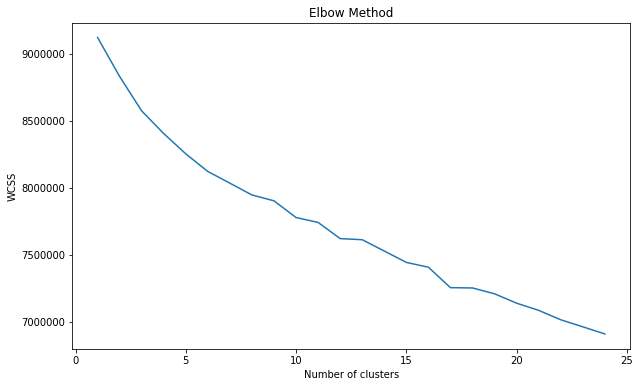

In [19]:
plt.figure(figsize=(10,6))
plt.plot(range(1,25),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [20]:
%%time

#Find the number of clusters
wcss_X = []
for i in range(1,25):
    Kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    Kmeans.fit(X)
    wcss_X.append(Kmeans.inertia_)

CPU times: user 5min 57s, sys: 36.5 s, total: 6min 33s
Wall time: 6min 1s


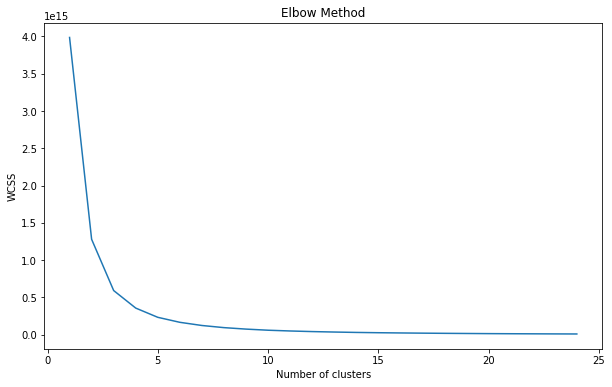

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(1,25),wcss_X)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

### Silhouette Coefficient

In [ ]:
%%time
from sklearn import metrics

scores = []
for k in range(2,3):
    labels = KMeans(n_clusters=k, init='k-means++', random_state=0).fit(X_std).labels_
    score = metrics.silhouette_score(X_std, labels)
    scores.append(score)

In [ ]:
#Find the number of clusters
plt.plot(list(range(2,3)),scores)
#plt.xticks(range(0,22,1)) 
plt.grid(linestyle='--')
plt.xlabel("Number of Clusters Initialized")
plt.ylabel("Sihouette Score")
sns.despine()

## K-means model

In [30]:
#KMeans cloustering
Kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
y = Kmeans.fit_predict(X_std)

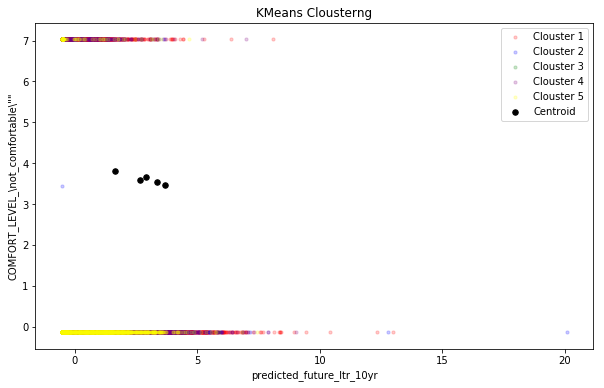

In [25]:
plt.figure(figsize=(10,6))

x_column = "predicted_future_ltr_10yr"
y_column = r'COMFORT_LEVEL_\not_comfortable\""'
x_index = dataset.columns.get_loc(x_column)
y_index = dataset.columns.get_loc(y_column)

plt.scatter(X_std[y==0,x_index],X_std[y==0,y_index], s=10, c='red', label='Clouster 1',alpha = 0.2 )
plt.scatter(X_std[y==1,x_index],X_std[y==1,y_index], s=10, c='blue', label='Clouster 2' ,alpha = 0.2 )
plt.scatter(X_std[y==2,x_index],X_std[y==2,y_index], s=10, c='green', label='Clouster 3' ,alpha = 0.2 )
plt.scatter(X_std[y==3,x_index],X_std[y==3,y_index], s=10, c='purple', label='Clouster 4',alpha = 0.2  )
plt.scatter(X_std[y==4,x_index],X_std[y==4,y_index], s=10, c='yellow', label='Clouster 5',alpha = 0.2  )

plt.scatter(Kmeans.cluster_centers_[:,0], Kmeans.cluster_centers_[:,1], s =30, c = 'black', label='Centroid')
plt.title("KMeans Clousterng")
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.legend()
plt.show()

# Visualization

## PCA

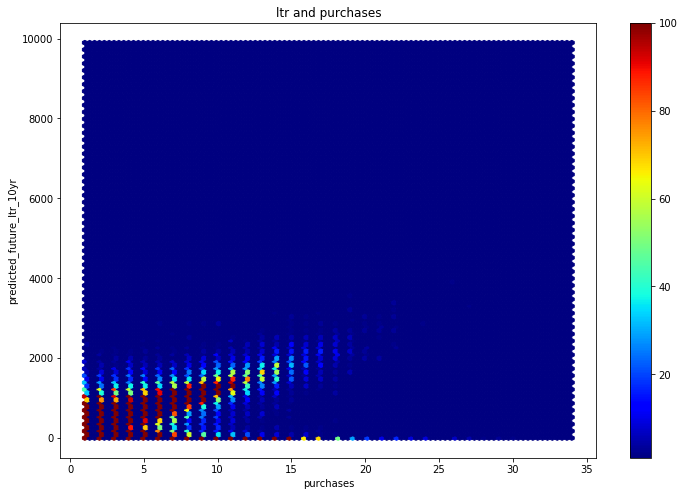

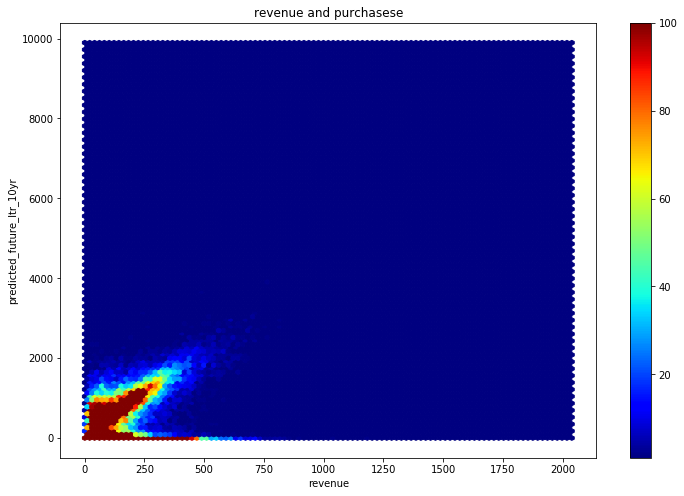

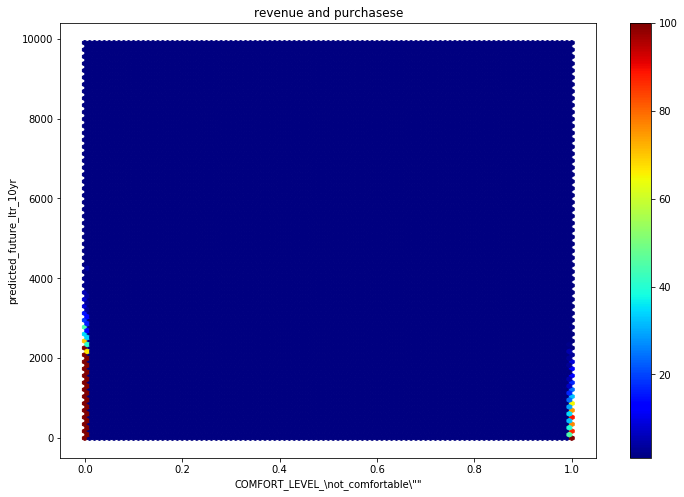

In [26]:
dataset.plot(y = 'predicted_future_ltr_10yr', x = 'purchases', kind = 'hexbin', gridsize=100, sharex=False, 
             colormap='jet', title='ltr and purchases',figsize=(12,8),vmin=1,vmax=100)
dataset.plot(y ='predicted_future_ltr_10yr', x = 'revenue', kind='hexbin', gridsize = 100, sharex = False,
             colormap = 'jet', title='revenue and purchasese', figsize = (12,8),vmin=1,vmax=100)
dataset.plot(y ='predicted_future_ltr_10yr', x = r'COMFORT_LEVEL_\not_comfortable\""', kind='hexbin', gridsize = 100, sharex = False,
             colormap = 'jet', title='revenue and purchasese', figsize = (12,8),vmin=1,vmax=100)

CPU times: user 1.85 s, sys: 83.3 ms, total: 1.94 s
Wall time: 1.94 s


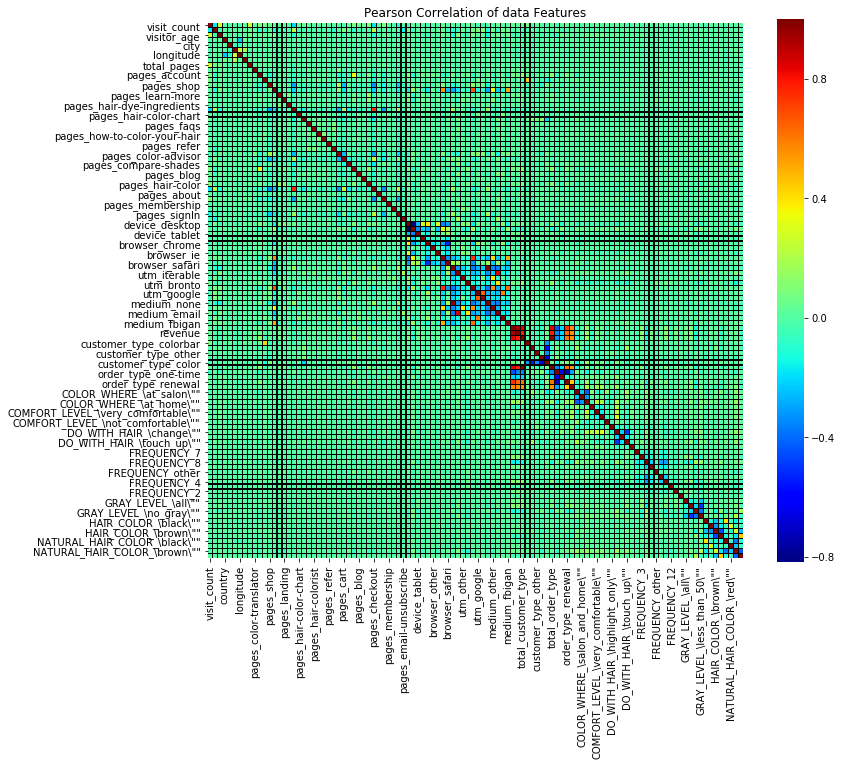

In [41]:
%%time
f, ax = plt.subplots(figsize=(12,10))
plt.title('Pearson Correlation of data Features')
sns.heatmap(dataset.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True,
           cmap="jet", linecolor='black', annot=False) , #annot_kws={"size": 20}

In [42]:
f.savefig('heatmap',dpi=400)

### Explained Variance Measure

In [50]:
#Calculating Eigenvecors and eigenvalues of Covariance matrix
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

group them together by creating a list of eigenvalue, eigenvector tuples. Followed by sortin the list in order of highest to lowest eigenvalue to calculate variances for visualisation.



In [51]:
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

In [52]:
cum_var_exp

array([   4.81147457 +0.00000000e+00j,    8.80952551 +0.00000000e+00j,
         11.59875750 +0.00000000e+00j,   14.28933484 +0.00000000e+00j,
         16.71954779 +0.00000000e+00j,   18.99381719 +0.00000000e+00j,
         21.19459313 +0.00000000e+00j,   23.12577489 +0.00000000e+00j,
         24.87165709 +0.00000000e+00j,   26.51948111 +0.00000000e+00j,
         28.11462645 +0.00000000e+00j,   29.64448114 +0.00000000e+00j,
         31.13234212 +0.00000000e+00j,   32.54192464 +0.00000000e+00j,
         33.89735095 +0.00000000e+00j,   35.22482046 +0.00000000e+00j,
         36.52103074 +0.00000000e+00j,   37.78828001 +0.00000000e+00j,
         39.04075173 +0.00000000e+00j,   40.28962435 +0.00000000e+00j,
         41.51095067 +0.00000000e+00j,   42.69041046 +0.00000000e+00j,
         43.82541882 +0.00000000e+00j,   44.93776363 +0.00000000e+00j,
         46.03302664 +0.00000000e+00j,   47.11636515 +0.00000000e+00j,
         48.19504344 +0.00000000e+00j,   49.26320207 +0.00000000e+00j,
      

/anaconda3/lib/python3.6/site-packages/matplotlib/transforms.py:814: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)


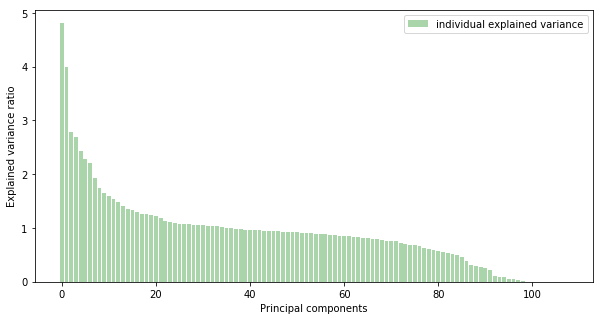

In [53]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
#plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/transforms.py:814: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


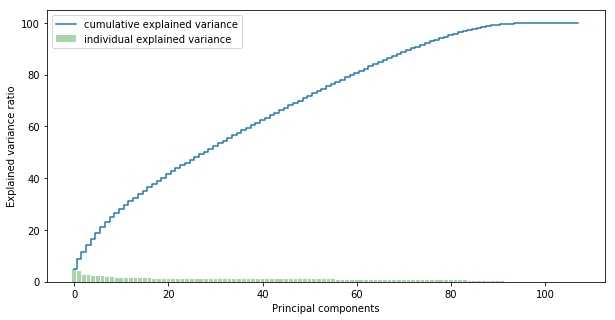

In [54]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [55]:
dataset.describe()

,visit_count,avg_session_length,visitor_age,city,state,longitude,latitude,total_pages,pages_color-translator,pages_account,pages_colorbar,pages_shop,pages_welcome,pages_learn-more,pages_landing,pages_hair-dye-ingredients,pages_confirmation,pages_hair-color-chart,pages_shopping,pages_faqs,pages_hair-colorist,pages_how-to-color-your-hair,pages_other,pages_refer,pages_support,pages_color-advisor,pages_cart,pages_compare-shades,pages_notloggedin,pages_blog,pages_search,pages_hair-color,pages_checkout,pages_about,pages_product,pages_membership,pages_share,pages_signIn,pages_email-unsubscribe,device_desktop,device_mobile,device_tablet,browser_firefox,browser_chrome,browser_other,browser_ie,browser_facebook,browser_safari,utm_direct,utm_iterable,utm_other,utm_bronto,utm_facebook,utm_google,medium_cpc,medium_none,medium_other,medium_email,medium_organic,medium_fbigan,purchases,revenue,total_customer_type,customer_type_colorbar,customer_type_rootreboot,customer_type_other,customer_type_gloss,customer_type_color,total_order_type,order_type_one-time,order_type_subscription,order_type_renewal,predicted_future_ltr_10yr,"COLOR_WHERE_\at_salon\""""","COLOR_WHERE_\salon_and_home\""""","COLOR_WHERE_\at_home\""""","COMFORT_LEVEL_\somewhat_comfortable\""""","COMFORT_LEVEL_\very_comfortable\""""","COMFORT_LEVEL_\comfortable\""""","COMFORT_LEVEL_\not_comfortable\""""","DO_WITH_HAIR_\highlight_only\""""","DO_WITH_HAIR_\change\""""","DO_WITH_HAIR_\not_sure\""""","DO_WITH_HAIR_\touch_up\""""","DO_WITH_HAIR_\color_and_highlights\""""",FREQUENCY_7,FREQUENCY_3,FREQUENCY_8,FREQUENCY_5,FREQUENCY_other,FREQUENCY_6,FREQUENCY_4,FREQUENCY_12,FREQUENCY_2,"GRAY_LEVEL_\not_sure\""""","GRAY_LEVEL_\all\""""","GRAY_LEVEL_\more_than_50\""""","GRAY_LEVEL_\no_gray\""""","GRAY_LEVEL_\less_than_50\""""","HAIR_COLOR_\black\""""","HAIR_COLOR_\red\""""","HAIR_COLOR_\brown\""""","HAIR_COLOR_\blonde\""""","NATURAL_HAIR_COLOR_\black\""""","NATURAL_HAIR_COLOR_\red\""""","NATURAL_HAIR_COLOR_\brown\""""","NATURAL_HAIR_COLOR_\blonde\"""""
count,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000,84446.00000
mean,2.04230,3.73972,131100.35303,2999.91752,81.68347,-92.50191,37.69615,12.27425,0.00109,0.01965,0.00815,0.14035,0.05345,0.00349,0.00168,0.00122,0.05537,0.00303,0.02719,0.00168,0.00103,0.00429,0.00767,0.00347,0.00701,0.09238,0.11855,0.02147,0.00203,0.01359,0.00347,0.00227,0.13286,0.00139,0.18889,0.00230,0.00254,0.07100,0.00744,0.37317,0.53022,0.09661,0.04014,0.28501,0.07599,0.04715,0.16146,0.39023,0.31244,0.18015,0.08721,0.04827,0.21377,0.15815,0.10102,0.31296,0.18566,0.23546,0.07601,0.08886,3.58502,109.60466,4.81695,0.00720,0.02263,0.00803,0.03086,0.93128,4.81695,0.42386,0.24810,0.32804,245.61832,0.23154,0.14288,0.37271,0.08381,0.11286,0.15303,0.01981,0.01750,0.37150,0.06865,0.2

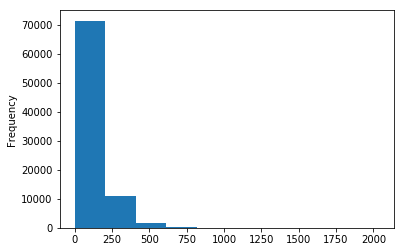

In [56]:
dataset['revenue'].plot.hist()

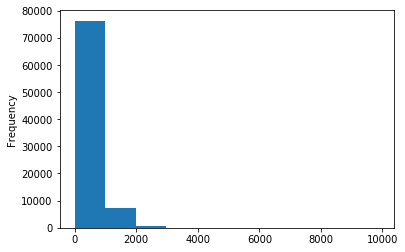

In [57]:
dataset['predicted_future_ltr_10yr'].plot.hist()

In [58]:
dataset['revenue_classes'] = pd.cut(dataset['revenue'],10)
dataset['predicted_future_ltr_10yr_classes'] = pd.cut(dataset['predicted_future_ltr_10yr'],4, labels=["low", "medium-low","medium-high","high"])

In [59]:
list(dataset)


['visit_count',
 'avg_session_length',
 'visitor_age',
 'country',
 'city',
 'state',
 'longitude',
 'latitude',
 'total_pages',
 'pages_color-translator',
 'pages_account',
 'pages_colorbar',
 'pages_shop',
 'pages_welcome',
 'pages_learn-more',
 'pages_landing',
 'pages_hair-dye-ingredients',
 'pages_confirmation',
 'pages_hair-color-chart',
 'pages_shopping',
 'pages_faqs',
 'pages_hair-colorist',
 'pages_how-to-color-your-hair',
 'pages_other',
 'pages_refer',
 'pages_support',
 'pages_color-advisor',
 'pages_cart',
 'pages_compare-shades',
 'pages_notloggedin',
 'pages_blog',
 'pages_search',
 'pages_hair-color',
 'pages_checkout',
 'pages_about',
 'pages_product',
 'pages_membership',
 'pages_share',
 'pages_signIn',
 'pages_email-unsubscribe',
 'device_desktop',
 'device_mobile',
 'device_tablet',
 'browser_firefox',
 'browser_chrome',
 'browser_other',
 'browser_ie',
 'browser_facebook',
 'browser_safari',
 'utm_direct',
 'utm_iterable',
 'utm_other',
 'utm_bronto',
 'utm_faceb

In [60]:
dataset.columns.get_loc('revenue')


62

In [61]:
X_revenue = dataset.ix[:,(10,62,73,100)].values
y_revenue = dataset.ix[:,108].values

X_ltr = dataset.ix[:,(10,62,73,100)].values
y_ltr = dataset.ix[:,109].values

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [62]:
X_ltr_std = StandardScaler().fit_transform(X_ltr)

In [63]:
print('NumPy covariance matrix: \n%s' %np.cov(X_ltr_std.T))

NumPy covariance matrix: 
[[ 1.00001184  0.04995885  0.0064775  -0.00498538]
 [ 0.04995885  1.00001184  0.55693253 -0.01246247]
 [ 0.0064775   0.55693253  1.00001184 -0.02923912]
 [-0.00498538 -0.01246247 -0.02923912  1.00001184]]


In [64]:
cov_mat = np.cov(X_ltr_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

#print('Eigenvectors \n%s' %eig_vecs)
#print('\nEigenvalues \n%s' %eig_vals)

In [65]:
cor_mat1 = np.corrcoef(X_ltr_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

#print('Eigenvectors \n%s' %eig_vecs)
#print('\nEigenvalues \n%s' %eig_vals)

In [66]:
cor_mat2 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

#print('Eigenvectors \n%s' %eig_vecs)
#print('\nEigenvalues \n%s' %eig_vals)

In [ ]:
# u,s,v = np.linalg.svd(X_ltr_std.T)
# u

In [36]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

AssertionError: 
Arrays are not almost equal to 6 decimals

(mismatch 100.0%)
 x: array(1.0)
 y: array(0.9999134224459577)

In [37]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
5.19639253384
4.31789501292
3.01237054824
2.90582352705
2.62462998969
2.45621095352
2.3768380164
2.08567630203
1.88555277571
1.77964993511
1.72275697373
1.65224306058
1.60688986485
1.52234912242
1.46386041467
1.4336670677
1.39990709659
1.36862921201
1.3526694562
1.34878243166
1.31903243089
1.27381657216
1.22580902356
1.20133239898
1.18288404947
1.17000559692
1.1649725528
1.15361131667
1.15025336764
1.13914348625
1.13564379494
1.12153386301
1.11460412099
1.11028251732
1.10549119467
1.07370949955
1.07135402681
1.06661003227
1.05782321892
1.04733056999
1.04286167541
1.04227673889
1.03188158553
1.02857245479
1.01890765936
1.01457441364
1.01243670471
1.0066425329
1.00311819709
0.999644043364
0.992550597714
0.98876978455
0.981490014475
0.970052681299
0.967175116228
0.963045015939
0.955434813557
0.943065762877
0.933532153667
0.925777082472
0.915756820014
0.909527744449
0.904137498329
0.891636392784
0.879223826717
0.869245900753
0.853044682118
0.84924850772
0.8

In [38]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(var_exp)
print(cum_var_exp)

[4.8114745683740381, 3.9980509378868647, 2.789231989114894, 2.6905773398631174, 2.4302129534180805, 2.2742694014118556, 2.2007759411101202, 1.9311817611401838, 1.7458821997313054, 1.6478240139940405, 1.5951453460419454, 1.5298546857209212, 1.4878609859677601, 1.4095825207612873, 1.3554263098776635, 1.3274695071289053, 1.2962102746185016, 1.267249270376464, 1.2524717187075991, 1.2488726219117041, 1.2213263248956763, 1.1794597890387888, 1.1350083551452002, 1.1123448138729581, 1.095263008763899, 1.0833385156692177, 1.0786782896285114, 1.0681586265448615, 1.0650494144835285, 1.0547624872724926, 1.0515220323521652, 1.0384572805681815, 1.0320408527671143, 1.0280393678871302, 1.0236029580254826, 0.9941754625440643, 0.99199446926804391, 0.98760188172892727, 0.97946594344618609, 0.96975052776572901, 0.96561266241898358, 0.96507105452658137, 0.95544591252980215, 0.95238190257980093, 0.94343301792821266, 0.93942075336758846, 0.93744139325200559, 0.9320764193498251, 0.92881314545319882, 0.92559633

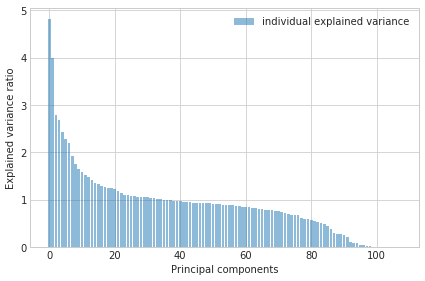

In [40]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(len(var_exp)), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    #plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [41]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(108,1),
                      eig_pairs[1][1].reshape(108,1),
                      eig_pairs[2][1].reshape(108,1),
                      eig_pairs[3][1].reshape(108,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[  2.97279482e-02  -4.53801050e-02   1.03519795e-01  -5.48462759e-02]
 [ -1.72985457e-02   9.41465699e-03  -3.75141969e-02   8.63999809e-02]
 [ -1.64143330e-03  -7.88725020e-02   1.11701907e-01  -8.99953992e-02]
 [  5.62432098e-03  -9.48506889e-03  -6.03277759e-03  -2.44842569e-03]
 [  3.71509303e-03   1.74754690e-03   6.39108037e-03  -3.00766506e-03]
 [ -1.74015153e-02  -1.04034219e-02  -1.53579458e-02  -1.36105408e-02]
 [ -1.34039663e-02   3.59697995e-03   2.96044244e-03  -2.23230841e-03]
 [ -6.62173925e-04   1.32911242e-02   7.29231522e-03   1.43526272e-02]
 [  7.69560942e-03  -1.15901006e-02   4.31092792e-02   6.92526799e-03]
 [  1.59749742e-02  -6.24891597e-03   1.59200928e-02   5.13812362e-03]
 [  7.06801404e-02   5.40483060e-02   3.66912289e-02   7.43000584e-02]
 [ -2.70098526e-03   9.09236644e-03   7.10441712e-02  -3.40485774e-02]
 [  7.06241020e-03  -1.30436588e-01   1.13780703e-01   3.54362017e-02]
 [ -4.24896521e-02  -3.53030710e-01  -6.17118531e-02   8.74207417e

In [42]:
eig_pairs[0][1].reshape(108,1)


array([[  2.97279482e-02],
       [ -1.72985457e-02],
       [ -1.64143330e-03],
       [  5.62432098e-03],
       [  3.71509303e-03],
       [ -1.74015153e-02],
       [ -1.34039663e-02],
       [ -6.62173925e-04],
       [  7.69560942e-03],
       [  1.59749742e-02],
       [  7.06801404e-02],
       [ -2.70098526e-03],
       [  7.06241020e-03],
       [ -4.24896521e-02],
       [  3.92147087e-02],
       [  2.14410634e-02],
       [  6.93004766e-03],
       [ -2.94146128e-02],
       [ -2.86289257e-03],
       [  6.46632333e-04],
       [  1.18017954e-02],
       [  1.12345167e-02],
       [  1.57915893e-03],
       [  2.00889469e-02],
       [  7.92861255e-03],
       [  1.29636954e-02],
       [ -1.81152519e-03],
       [ -2.58870687e-02],
       [  1.26119734e-02],
       [  7.84304724e-02],
       [  8.62847963e-03],
       [ -1.24587881e-02],
       [  5.28241814e-02],
       [ -2.54616566e-02],
       [  1.46485372e-02],
       [  3.37297038e-03],
       [  3.34953504e-03],
 

In [46]:
Y = X_std.dot(matrix_w.T)

ValueError: shapes (84446,108) and (4,108) not aligned: 108 (dim 1) != 4 (dim 0)

In [47]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('low', 'medium-low','medium-high', 'high'),
                        ('blue', 'red', 'green','orange')):
        plt.scatter(Y[y_votes==lab, 0],
                    Y[y_votes==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

NameError: name 'Y' is not defined

In [48]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components = 4)
Y_sklearn = sklearn_pca.fit_transform(X_std)


In [49]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6,4))
    for lab, col in zip(('low','medium-low','medium-high','high'),
                       ('blue','red','green','orange')):
        plt.scatter(Y_sklearn[y_votes==lab, 0],
                   Y_sklearn[y_votes==lab, 1],
                   label = lab,
                   c = col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

NameError: name 'y_votes' is not defined

In [85]:
#KMeans cloustering
Kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
y = Kmeans.fit_predict(X)

Projecting 108-dimensional data to 2D


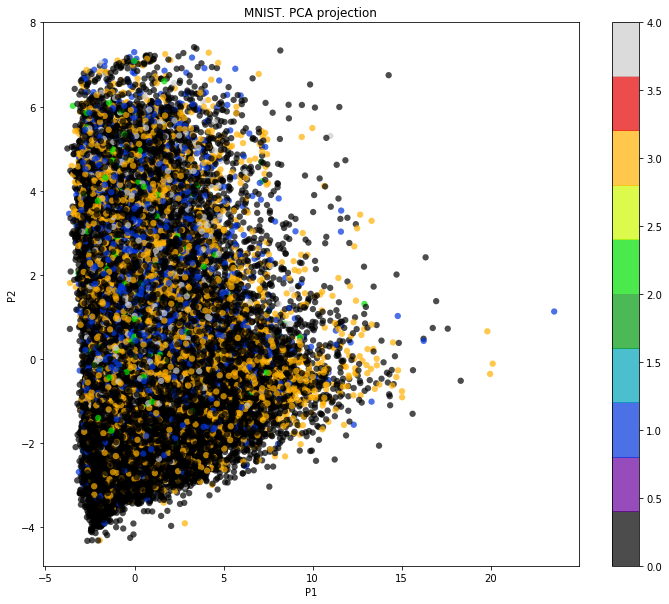

In [86]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=3)
X_reduced = pca.fit_transform(X_std)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel("P1")
plt.ylabel("P2")

plt.colorbar()
plt.title('MNIST. PCA projection');

In [87]:
#KMeans cloustering
Kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
y = Kmeans.fit_predict(X_std)

Projecting 108-dimensional data to 2D


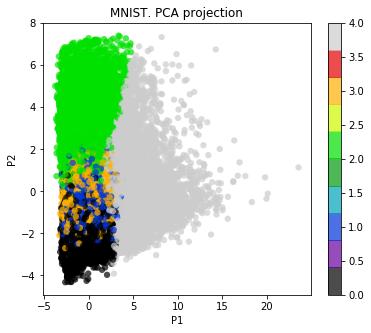

In [157]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=3)
X_reduced = pca.fit_transform(X_std)

print('Projecting %d-dimensional data to 2D' % X.shape[1])
f, ax = plt.subplots(figsize=(6,5))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel("P1")
plt.ylabel("P2")

plt.colorbar()
plt.title('MNIST. PCA projection');
f.savefig('PCA_P1P2',dpi=400)

Projecting 108-dimensional data to 2D


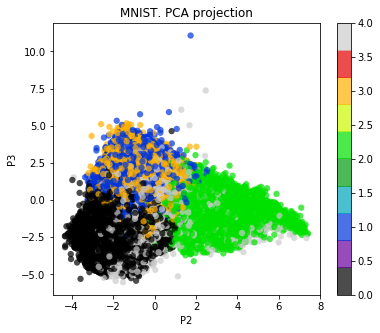

In [158]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=3)
X_reduced = pca.fit_transform(X_std)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

f, ax = plt.subplots(figsize=(6,5))
plt.scatter(X_reduced[:, 1], X_reduced[:, 2], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel("P2")
plt.ylabel("P3")

plt.colorbar()
plt.title('MNIST. PCA projection');
f.savefig('PCA_P2P3',dpi=400)

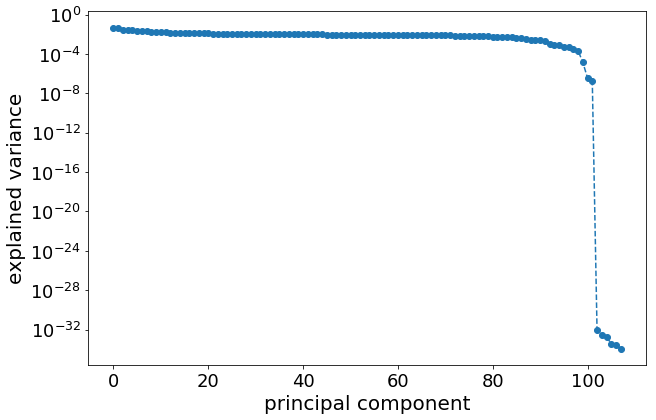

In [61]:
#Percentage of variance explained by each of the selected components.

from sklearn.decomposition import PCA
pca_trafo = PCA().fit(X_std)

plt.figure(figsize = (10,6.5));
plt.semilogy(pca_trafo.explained_variance_ratio_, '--o');
plt.xlabel('principal component', fontsize = 20);
plt.ylabel('explained variance', fontsize = 20);
plt.tick_params(axis='both', which='major', labelsize=18);
plt.tick_params(axis='both', which='minor', labelsize=12);
#plt.xlim([0, 29]);

In [62]:
plt.figure(figsize = (10,6.5));
plt.semilogy(np.square(X.std(axis=0)) / np.square(X.std(axis=0)).sum(), '--o', label = 'variance ratio');
plt.semilogy(X.mean(axis=0) / np.square(X.mean(axis=0)).sum(), '--o', label = 'mean ratio');
plt.xlabel('original feature', fontsize = 20);
plt.ylabel('variance', fontsize = 20);
plt.tick_params(axis='both', which='major', labelsize=18);
plt.tick_params(axis='both', which='minor', labelsize=12);
#plt.xlim([0, 29]);
plt.legend(loc='lower left', fontsize=18);

AttributeError: 'float' object has no attribute 'sqrt'

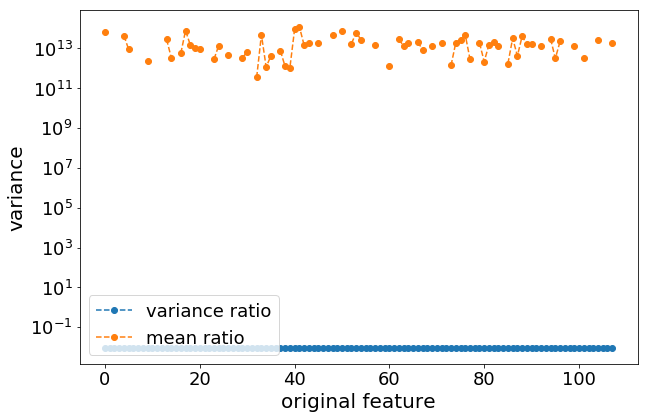

In [59]:
plt.figure(figsize = (10,6.5));
plt.semilogy(np.square(X_std.std(axis=0)) / np.square(X_std.std(axis=0)).sum(), '--o', label = 'variance ratio');
plt.semilogy(X_std.mean(axis=0) / np.square(X_std.mean(axis=0)).sum(), '--o', label = 'mean ratio');
plt.xlabel('original feature', fontsize = 20);
plt.ylabel('variance', fontsize = 20);
plt.tick_params(axis='both', which='major', labelsize=18);
plt.tick_params(axis='both', which='minor', labelsize=12);
#plt.xlim([0, 29]);
plt.legend(loc='lower left', fontsize=18);

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


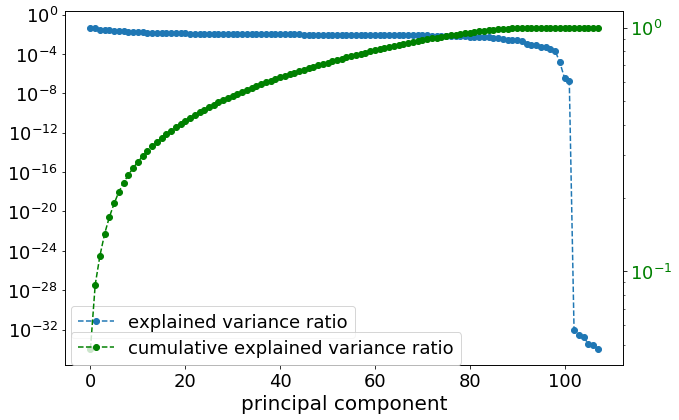

In [66]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

z_scaler = StandardScaler()
data = X;

z_data = z_scaler.fit_transform(data)
pca_trafo = PCA().fit(z_data);

fig, ax1 = plt.subplots(figsize = (10,6.5))
ax1.semilogy(pca_trafo.explained_variance_ratio_, '--o', label = 'explained variance ratio');
color =  ax1.lines[0].get_color()
ax1.set_xlabel('principal component', fontsize = 20);

    
plt.legend(loc=(0.01, 0.075) ,fontsize = 18);

ax2 = ax1.twinx()
ax2.semilogy(pca_trafo.explained_variance_ratio_.cumsum(), '--go', label = 'cumulative explained variance ratio');
for tl in ax2.get_yticklabels():
    tl.set_color('g')

ax1.tick_params(axis='both', which='major', labelsize=18);
ax1.tick_params(axis='both', which='minor', labelsize=12);
ax2.tick_params(axis='both', which='major', labelsize=18);
ax2.tick_params(axis='both', which='minor', labelsize=12);
#plt.xlim([0, 29]);
plt.legend(loc=(0.01, 0),fontsize = 18);

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


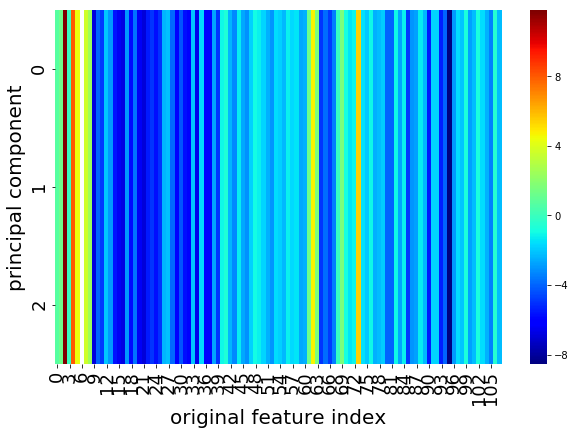

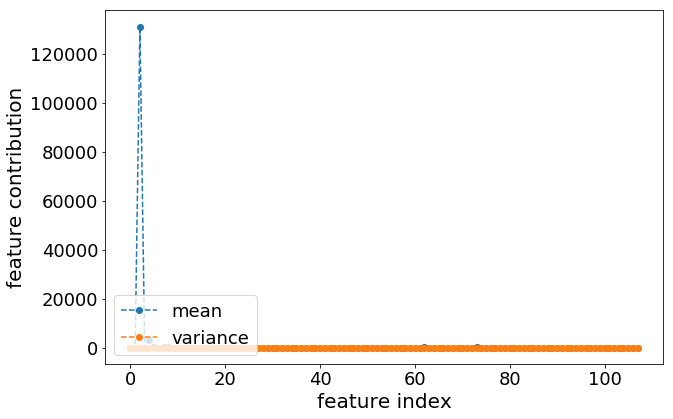

In [76]:
from sklearn.decomposition import PCA

n_comp =3
pca_trafo = PCA(n_components=n_comp)
data = X

pca_data = pca_trafo.fit_transform(data)
pca_inv_data = pca_trafo.inverse_transform(np.eye(n_comp))

fig = plt.figure(figsize=(10, 6.5))
sns.heatmap(np.log(pca_trafo.inverse_transform(np.eye(n_comp))), cmap="jet", cbar=True)
plt.ylabel('principal component', fontsize=20);
plt.xlabel('original feature index', fontsize=20);
plt.tick_params(axis='both', which='major', labelsize=18);
plt.tick_params(axis='both', which='minor', labelsize=12);

fig = plt.figure(figsize=(10, 6.5))
plt.plot(pca_inv_data.mean(axis=0), '--o', label = 'mean')
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.legend(loc='lower right')
plt.ylabel('feature contribution', fontsize=20);
plt.xlabel('feature index', fontsize=20);
plt.tick_params(axis='both', which='major', labelsize=18);
plt.tick_params(axis='both', which='minor', labelsize=12);
#plt.xlim([0, 29])
plt.legend(loc='lower left', fontsize=18)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


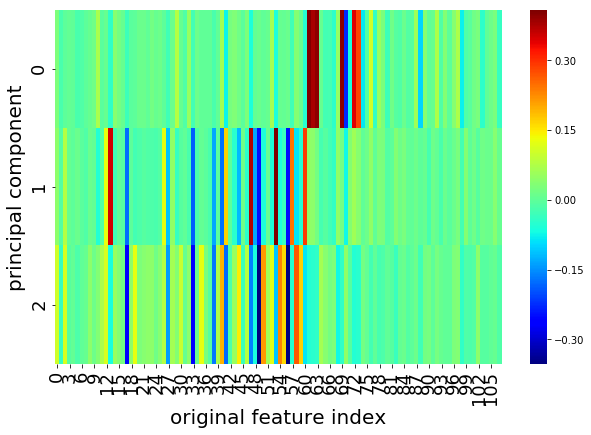

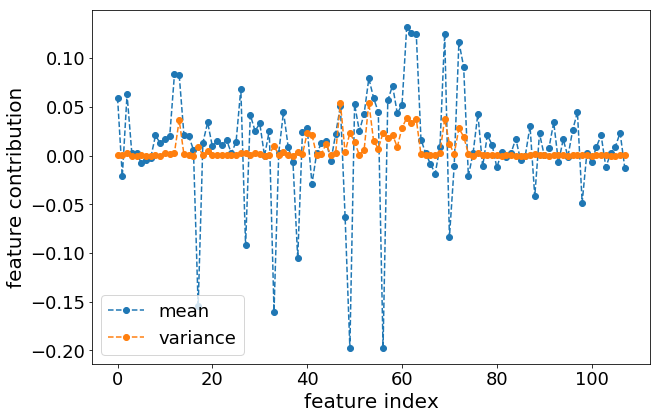

In [185]:
n_comp =3
pca_trafo = PCA(n_components=n_comp)
data = X

z_scaler = StandardScaler()
z_data = z_scaler.fit_transform(data)

pca_data = pca_trafo.fit_transform(z_data)
pca_inv_data = pca_trafo.inverse_transform(np.eye(n_comp))

fig = plt.figure(figsize=(10, 6.5))
sns.heatmap(pca_trafo.inverse_transform(np.eye(n_comp)), cmap="jet", cbar=True)
plt.ylabel('principal component', fontsize=20);
plt.xlabel('original feature index', fontsize=20);
plt.tick_params(axis='both', which='major', labelsize=18);
plt.tick_params(axis='both', which='minor', labelsize=12);

fig = plt.figure(figsize=(10, 6.5))
plt.plot(pca_inv_data.mean(axis=0), '--o', label = 'mean')
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.legend(loc='lower right')
plt.ylabel('feature contribution', fontsize=20);
plt.xlabel('feature index', fontsize=20);
plt.tick_params(axis='both', which='major', labelsize=18);
plt.tick_params(axis='both', which='minor', labelsize=12);
#plt.xlim([0, 29])
plt.legend(loc='lower left', fontsize=18)
#fig.savefig('P_vs_Features_3comp',dpi=400)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


Text(87,0.5,'P2')

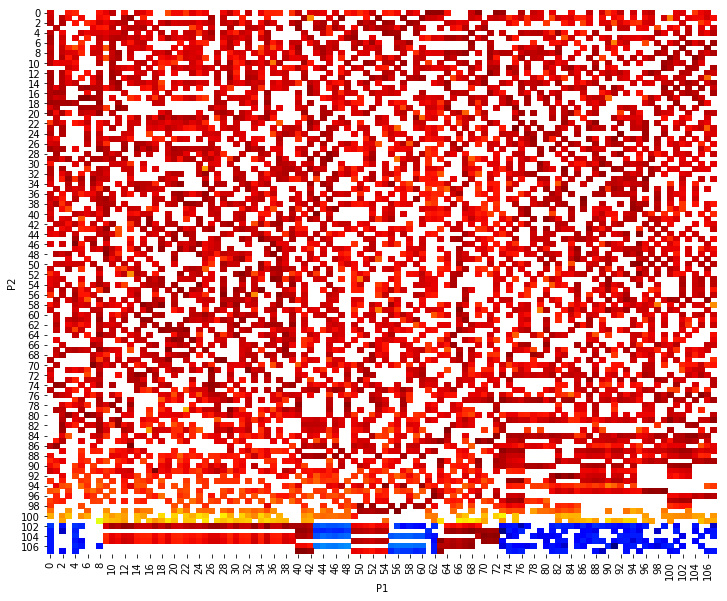

In [84]:
plt.figure(figsize=(12,10))

pca_trafo = PCA()
pca_data = pca_trafo.fit_transform(X_std)

sns.heatmap(np.log(pca_trafo.inverse_transform(np.eye(X_std.shape[1]))), cmap="jet", cbar=False)
plt.xlabel("P1")
plt.ylabel("P2")

In [147]:
n_comp =3
pca_trafo = PCA(n_components=n_comp)
data = X

z_scaler = StandardScaler()
z_data = z_scaler.fit_transform(data)

pca_data = pca_trafo.fit_transform(z_data)
pca_inv_data = pca_trafo.inverse_transform(np.eye(n_comp))
top=6
P_features_index = [list(map(list(pca_inv_data[i]).index, heapq.nlargest(top, list(pca_inv_data[i])))) for i in range(n_comp)]
P_features = []
for i in range(n_comp):
    P_features.append([list(dataset)[j] for j in P_features_index[i]])

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [148]:
for i in range(n_comp):
    print("P%s = %s"% (i,P_features[i]))

P0 = ['purchases', 'total_customer_type', 'total_customer_type', 'revenue', 'order_type_renewal', 'predicted_future_ltr_10yr']
P1 = ['utm_facebook', 'browser_facebook', 'pages_welcome', 'medium_fbigan', 'medium_other', 'device_mobile']
P2 = ['medium_email', 'utm_google', 'utm_iterable', 'device_desktop', 'medium_organic', 'medium_cpc']


### 5 P components

Projecting 108-dimensional data to 2D


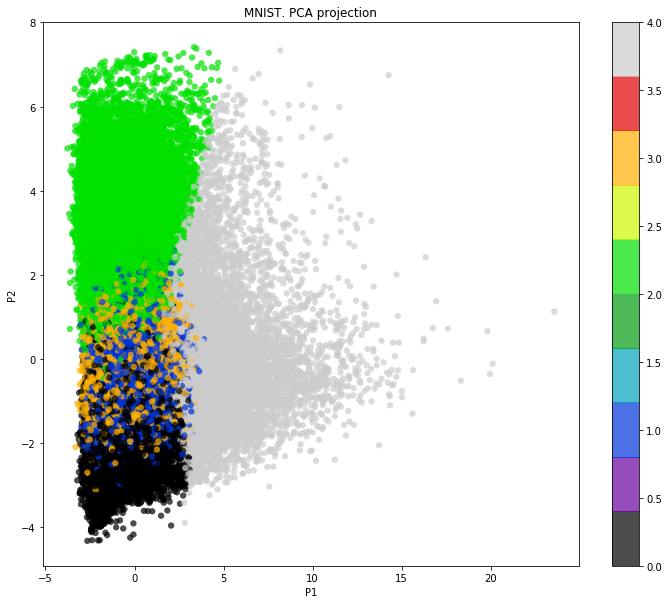

In [149]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=5)
X_reduced = pca.fit_transform(X_std)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel("P1")
plt.ylabel("P2")

plt.colorbar()
plt.title('MNIST. PCA projection');

Projecting 108-dimensional data to 2D


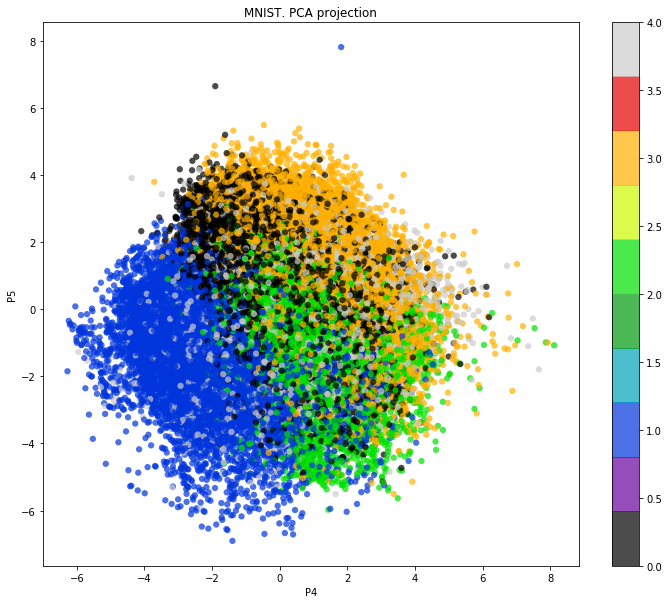

In [150]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=5)
X_reduced = pca.fit_transform(X_std)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 3], X_reduced[:, 4], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel("P4")
plt.ylabel("P5")

plt.colorbar()
plt.title('MNIST. PCA projection');

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


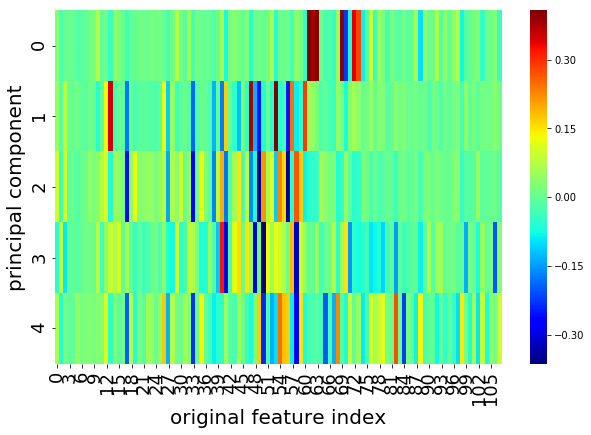

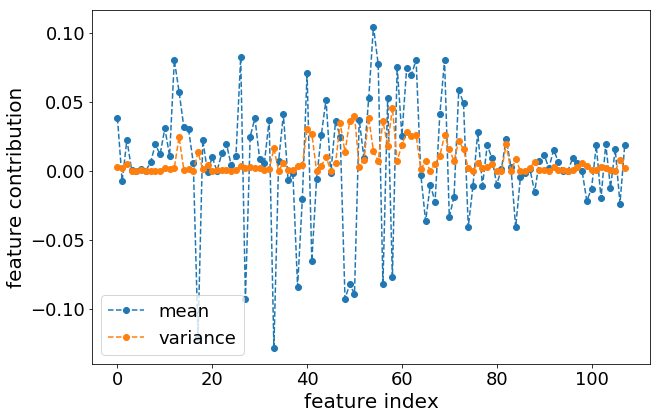

In [182]:
n_comp =5
pca_trafo = PCA(n_components=n_comp)
data = X

z_scaler = StandardScaler()
z_data = z_scaler.fit_transform(data)

pca_data = pca_trafo.fit_transform(z_data)
pca_inv_data = pca_trafo.inverse_transform(np.eye(n_comp))

fig = plt.figure(figsize=(10, 6.5))
sns.heatmap(pca_trafo.inverse_transform(np.eye(n_comp)), cmap="jet", cbar=True)
plt.ylabel('principal component', fontsize=20);
plt.xlabel('original feature index', fontsize=20);
plt.tick_params(axis='both', which='major', labelsize=18);
plt.tick_params(axis='both', which='minor', labelsize=12);

fig = plt.figure(figsize=(10, 6.5))
plt.plot(pca_inv_data.mean(axis=0), '--o', label = 'mean')
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.legend(loc='lower right')
plt.ylabel('feature contribution', fontsize=20);
plt.xlabel('feature index', fontsize=20);
plt.tick_params(axis='both', which='major', labelsize=18);
plt.tick_params(axis='both', which='minor', labelsize=12);
#plt.xlim([0, 29])
plt.legend(loc='lower left', fontsize=18)
#fig.savefig('P_vs_Features_5comp',dpi=400)

In [152]:
n_comp =5
pca_trafo = PCA(n_components=n_comp)
data = X

z_scaler = StandardScaler()
z_data = z_scaler.fit_transform(data)

pca_data = pca_trafo.fit_transform(z_data)
pca_inv_data = pca_trafo.inverse_transform(np.eye(n_comp))
top=6
P_features_index = [list(map(list(pca_inv_data[i]).index, heapq.nlargest(top, list(pca_inv_data[i])))) for i in range(n_comp)]
P_features = []
for i in range(n_comp):
    P_features.append([list(dataset)[j] for j in P_features_index[i]])

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [153]:
for i in range(n_comp):
    print("P%s = %s"% (i,P_features[i]))

P0 = ['purchases', 'total_customer_type', 'total_customer_type', 'revenue', 'order_type_renewal', 'predicted_future_ltr_10yr']
P1 = ['utm_facebook', 'browser_facebook', 'pages_welcome', 'medium_fbigan', 'medium_other', 'device_mobile']
P2 = ['medium_email', 'utm_google', 'utm_iterable', 'device_desktop', 'medium_organic', 'medium_cpc']
P3 = ['device_desktop', 'medium_other', 'browser_chrome', 'browser_ie', 'order_type_one-time', 'utm_other']
P4 = ['DO_WITH_HAIR_\\change\\""', 'utm_google', 'customer_type_color', 'medium_cpc', 'pages_color-advisor', 'utm_direct']


In [162]:
n_comp =10
pca_trafo = PCA(n_components=n_comp)
data = X

z_scaler = StandardScaler()
z_data = z_scaler.fit_transform(data)

pca_data = pca_trafo.fit_transform(z_data)
pca_inv_data = pca_trafo.inverse_transform(np.eye(n_comp))
top=10
P_features_index = [list(map(list(pca_inv_data[i]).index, heapq.nlargest(top, list(pca_inv_data[i])))) for i in range(n_comp)]
P_features = []
for i in range(n_comp):
    P_features.append([list(dataset)[j] for j in P_features_index[i]])

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [163]:
for i in range(n_comp):
    print("P%s = %s"% (i,P_features[i]))

P0 = ['purchases', 'total_customer_type', 'total_customer_type', 'revenue', 'order_type_renewal', 'predicted_future_ltr_10yr', 'COLOR_WHERE_\\at_home\\""', 'pages_notloggedin', 'GRAY_LEVEL_\\more_than_50\\""', 'FREQUENCY_4']
P1 = ['utm_facebook', 'browser_facebook', 'pages_welcome', 'medium_fbigan', 'medium_other', 'device_mobile', 'pages_shop', 'pages_color-advisor', 'visitor_age', 'order_type_renewal']
P2 = ['medium_email', 'utm_google', 'utm_iterable', 'device_desktop', 'medium_organic', 'medium_cpc', 'browser_chrome', 'pages_product', 'pages_shopping', 'utm_bronto']
P3 = ['device_desktop', 'medium_other', 'browser_chrome', 'browser_ie', 'order_type_one-time', 'utm_other', 'utm_facebook', 'browser_firefox', 'pages_landing', 'pages_notloggedin']
P4 = ['DO_WITH_HAIR_\\change\\""', 'utm_google', 'customer_type_color', 'medium_cpc', 'pages_color-advisor', 'utm_direct', 'medium_none', 'medium_organic', 'GRAY_LEVEL_\\no_gray\\""', 'pages_product']
P5 = ['utm_direct', 'medium_none', 'visit

In [173]:
P_features_table = pd.DataFrame(P_features) 
P_features_table.columns = ['feature1', 'feature2', 'feature3','feature4','feature5','feature6','feature7','feature8','feature9','feature10',]
P_features_table.index = ['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10',]

In [175]:
P_features_table.head(10)

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10
P1,purchases,total_customer_type,total_customer_type,revenue,order_type_renewal,predicted_future_ltr_10yr,"COLOR_WHERE_\at_home\""""",pages_notloggedin,"GRAY_LEVEL_\more_than_50\""""",FREQUENCY_4
P2,utm_facebook,browser_facebook,pages_welcome,medium_fbigan,medium_other,device_mobile,pages_shop,pages_color-advisor,visitor_age,order_type_renewal
P3,medium_email,utm_google,utm_iterable,device_desktop,medium_organic,medium_cpc,browser_chrome,pages_product,pages_shopping,utm_bronto
P4,device_desktop,medium_other,browser_chrome,browser_ie,order_type_one-time,utm_other,utm_facebook,browser_firefox,pages_landing,pages_notloggedin
P5,"DO_WITH_HAIR_\change\""""",utm_google,customer_type_color,medium_cpc,pages_color-advisor,utm_direct,medium_none,medium_organic,"GRAY_LEVEL_\no_gray\""""",pages_product
P6,utm_direct,medium_none,visit_count,pages_shopping,customer_type_gloss,customer_type_rootreboot,browser_safari,customer_type_colorbar,device_tablet,order_type_one-time
P7,medium_email,utm_bronto,"HAIR_COLOR_\blonde\""""","NATURAL_HAIR_COLOR_\blonde\""""",customer_type_color,utm_iterable,pages_notloggedin,visit_count,pages_product,pages_account
P8,"HAIR_COLOR_\brown\""""","NATURAL_HAIR_COLOR_\brown\""""",device_desktop,"GRAY_LEVEL_\less_than_50\""""",customer_type_color,browser_chrome,"DO_WITH_HAIR_\change\""""",pages_account,medium_none,utm_direct
P9,customer_type_gloss,"DO_WITH_HAIR_\change\""""",customer_type_colorbar,pages_colorbar,order_type_subscription,customer_type_other,browser_chrome,"GRAY_LEVEL_\no_gray\""""",FREQUENCY_8,"NATURAL_HAIR_COLOR_\blonde\"""""
P10,"NATURAL_HAIR_COLOR_\black\""""","HAIR_COLOR_\black\""""",pages_colorbar,customer_type_colorbar,"COLOR_WHERE_\at_home\""""",order_type_subscription,visitor_age,FREQUENCY_2,FREQUENCY_4,FREQUENCY_3


In [176]:
P_features_table.to_csv('PCA_features.csv',index=True)

In [189]:
n_comp =108
pca_trafo = PCA(n_components=n_comp)
data = X

z_scaler = StandardScaler()
z_data = z_scaler.fit_transform(data)

pca_data = pca_trafo.fit_transform(z_data)
pca_inv_data = pca_trafo.inverse_transform(np.eye(n_comp))
top=108
P_features_index = [list(map(list(pca_inv_data[i]).index, heapq.nlargest(top, list(pca_inv_data[i])))) for i in range(n_comp)]
P_features = []
for i in range(n_comp):
    P_features.append([list(dataset)[j] for j in P_features_index[i]])
P_features_table = pd.DataFrame(P_features) 
P_features_table.columns = [f'Feature {i}' for i in range(1, top+1)]
P_features_table.index = [f'P {i}' for i in range(1, n_comp+1)]
P_features_table.to_csv('PCA_features_full.csv',index=True)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


['Period 1',
 'Period 2',
 'Period 3',
 'Period 4',
 'Period 5',
 'Period 6',
 'Period 7',
 'Period 8',
 'Period 9',
 'Period 10',
 'Period 11',
 'Period 12',
 'Period 13']

CPU times: user 52min 31s, sys: 3min 35s, total: 56min 6s
Wall time: 48min 27s


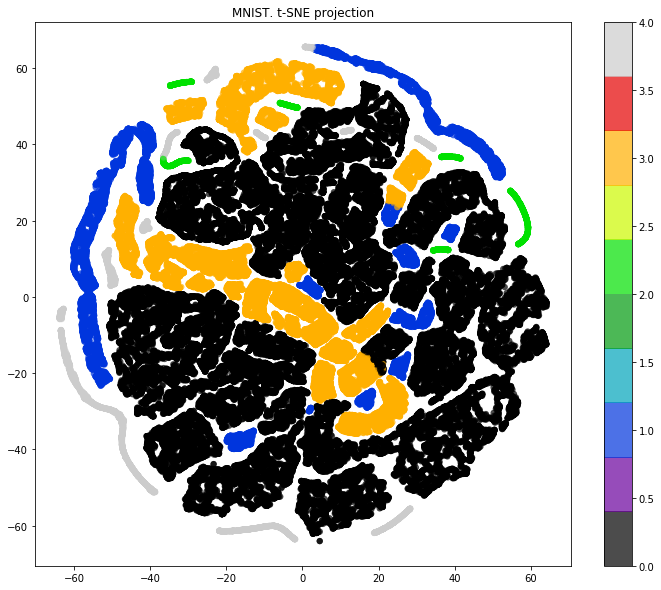

In [127]:
%%time

from sklearn.manifold import TSNE
tsne = TSNE(random_state=17)

X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. t-SNE projection');

CPU times: user 1h 30min 10s, sys: 3min 48s, total: 1h 33min 59s
Wall time: 1h 26min 22s


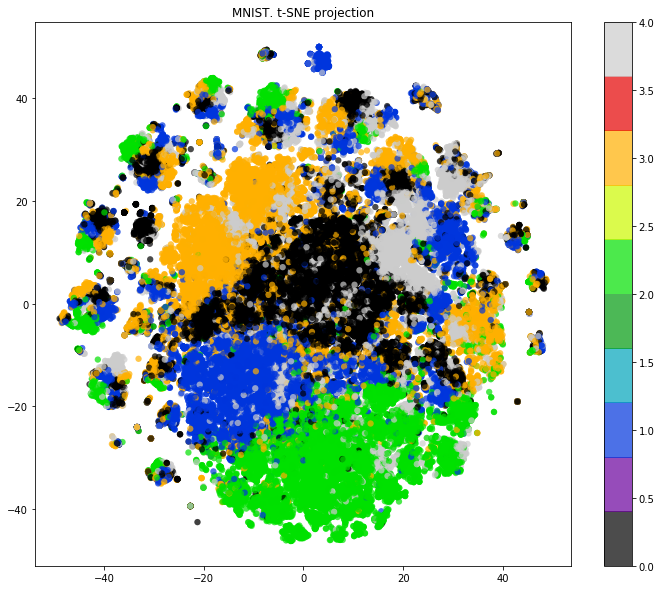

In [74]:
%%time

from sklearn.manifold import TSNE
tsne = TSNE(random_state=17)

X_tsne = tsne.fit_transform(X_std)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. t-SNE projection');

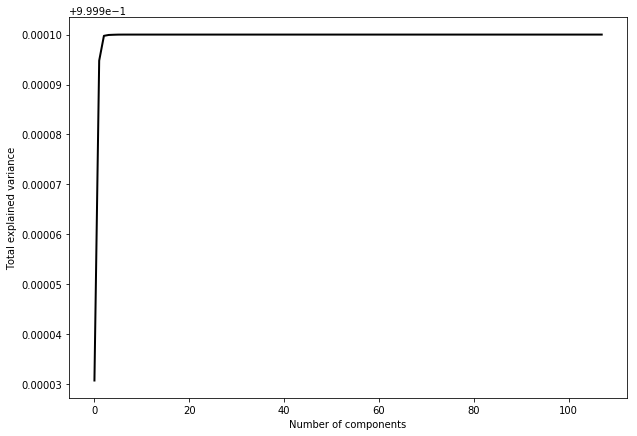

In [44]:
pca = decomposition.PCA().fit(X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
#plt.xlim(0, 63)
#plt.yticks(np.arange(0, 1.1, 0.1))
#plt.axvline(21, c='b')
#plt.axhline(0.9, c='r')
plt.show();

In [45]:
pca = decomposition.PCA(n_components=7)
x_7d = pca.fit_transform(X_std)

In [46]:
pca4 = decomposition.PCA(n_components=4)
x_4d = pca.fit_transform(X_std)

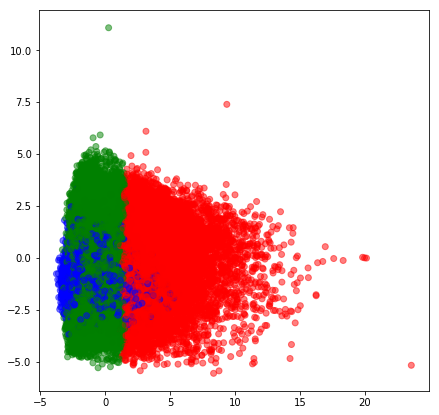

In [47]:
#Set a 3 KMeans clustering
kmeans = KMeans(n_clusters = 3)

#Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_7d)

#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b', 3: 'purple', 4: 'y'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_7d[:,0],x_7d[:,2], c= label_color, alpha=0.5) 
plt.show()

In [48]:
# Create a temp dataframe from our PCA projection data "x_9d"
df = pd.DataFrame(x_4d)
df = df[[0,1,2]] # only want to visualise relationships between first 3 projections
df['X_cluster'] = X_clustered

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


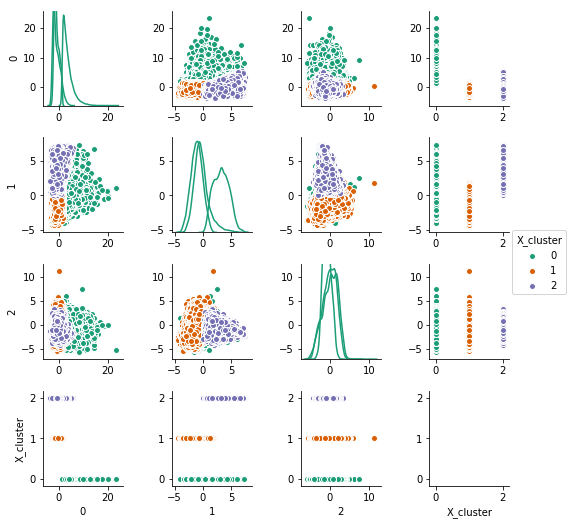

In [49]:
# Call Seaborn's pairplot to visualize our KMeans clustering on the PCA projected data
sns.pairplot(df, hue='X_cluster', palette= 'Dark2', diag_kind='kde',size=1.85)